# HAND WRITTEN TEXT GENERATION

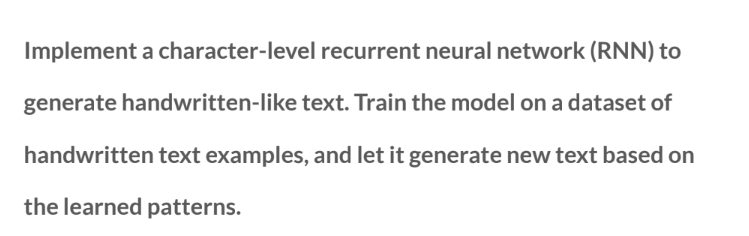

**IMPORT LIBRARIES**

In [3]:
import numpy as np

data = np.load('deepwriting_training.npz', allow_pickle=True)
lst = data.files

for item in lst:
    print(item)
    print(data[item])

subject_labels
[123468  10019  10129 ... 123526  10056  10021]
eoc_labels
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**MODEL BUILDING**

In [4]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset from .npz file
data = np.load('handwritten_text_dataset.npz')
X_train = data['X_train']
Y_train = np.roll(X_train, -1, axis=1)
Y_train[:, -1] = X_train[:, 0]

# Define constants
SEQ_LENGTH = X_train.shape[1]
BATCH_SIZE = 64
VOCAB_SIZE = 128
EMBED_DIM = 256
RNN_UNITS = 512

# Build the model
model = keras.Sequential([
    layers.Embedding(VOCAB_SIZE, EMBED_DIM, input_length=SEQ_LENGTH),
    layers.LSTM(RNN_UNITS, return_sequences=True),
    layers.LSTM(RNN_UNITS, return_sequences=True),
    layers.Dense(VOCAB_SIZE, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=10)

# Function to generate text
def generate_text(model, start_string, temperature=1.0, num_generate=1000):
    input_eval = [ord(s) for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    model.reset_states()

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(chr(predicted_id))

    return start_string + ''.join(text_generated)

# Generate text using the trained model
generated_text = generate_text(model, start_string='The')
print(generated_text)


FileNotFoundError: [Errno 2] No such file or directory: 'handwritten_text_dataset.npz'